In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.preprocessing.image import load_img

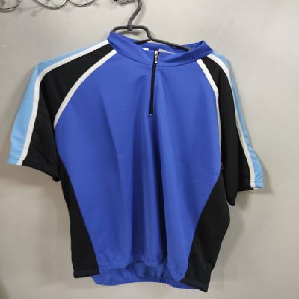

In [4]:
path = './clothing-dataset-small/train/t-shirt/'
name = '5f046ec9-4a0c-4c31-a80a-8f71f494d295.jpg'
full_path = f'{path}/{name}'
img = load_img(full_path, target_size=(299, 299))
img

In [5]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x16C171710>


In [6]:
x = np.array(img) # RGB pixel value
x.shape

(299, 299, 3)

In [7]:
## Pre-trained CNN

In [8]:
# ImageNet pretrained model trained on different sorts of images.

In [9]:
# sage-maker ml p2, kernel tensorflow 

In [10]:
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [12]:
X = np.array([x])

In [13]:
X.shape


(1, 299, 299, 3)

In [14]:
# Without preprocessing you would get zeres

In [15]:
X = preprocess_input(X)
pred = model.predict(X)
pred[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


array([[3.74707015e-04, 1.86929450e-04, 3.84725718e-04, 1.47631567e-04,
        3.59762460e-04, 2.83216301e-04, 3.85828578e-04, 3.49732145e-04,
        3.37630685e-04, 2.80016742e-04, 2.47525721e-04, 4.97440167e-04,
        1.33427777e-04, 2.63234688e-04, 3.67286440e-04, 2.40524576e-04,
        2.79618718e-04, 3.12819495e-04, 2.21167400e-04, 2.61674868e-04,
        4.69991472e-04, 2.34495834e-04, 5.44332550e-04, 3.98726930e-04,
        4.62097727e-04, 2.81707122e-04, 6.98258285e-04, 4.32579400e-04,
        5.34310471e-04, 1.68379207e-04, 8.57538718e-04, 3.59297177e-04,
        5.25269017e-04, 2.90530879e-04, 3.18402250e-04, 4.73818422e-04,
        2.67431315e-04, 2.63750233e-04, 3.52648116e-04, 4.26510378e-04,
        4.63631441e-04, 1.01593940e-03, 5.67097217e-04, 3.37941543e-04,
        1.59441575e-03, 2.52185389e-04, 7.21331860e-04, 3.57728015e-04,
        2.97439634e-04, 9.18429811e-04, 2.98651168e-04, 2.08152895e-04,
        1.51100860e-03, 1.11319672e-03, 4.65452234e-04, 5.673327

In [16]:
decode_predictions(pred)

[[('n04370456', 'sweatshirt', 0.21572939),
  ('n03595614', 'jersey', 0.10740058),
  ('n03980874', 'poncho', 0.09007943),
  ('n02669723', 'academic_gown', 0.036129475),
  ('n04532106', 'vestment', 0.03097269)]]

### CNN

In [17]:
# Apply different filters (slide across different pixels) to the image and generates filter map corresponding to the similarity ..

In [18]:
# each layer in a NN learns features starting from a simple to a complex one.. (Edges, contours, simple shapes, complex shapes)

In [19]:
# Image => Conv Layers => Vector Repr => Dense Layers => Prediction

In [20]:
#!pip install keras-preprocessing

### 8.5 Transfer learning

In [24]:
from keras_preprocessing.image import ImageDataGenerator
# import tensorflow as tf


In [25]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [26]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     directory='./clothing-dataset-small/train',
#     labels='inferred',
#     label_mode='categorical',
#     batch_size=32,
#     image_size=(150, 150)
# )

In [28]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [29]:
!ls -l clothing-dataset-small/train

total 0
drwxr-xr-x  243 sethurama  staff   7776 28 Nov 22:59 dress
drwxr-xr-x  125 sethurama  staff   4000 28 Nov 22:59 hat
drwxr-xr-x  457 sethurama  staff  14624 28 Nov 22:59 longsleeve
drwxr-xr-x  186 sethurama  staff   5952 28 Nov 22:59 outwear
drwxr-xr-x  470 sethurama  staff  15040 28 Nov 22:59 pants
drwxr-xr-x  292 sethurama  staff   9344 28 Nov 22:59 shirt
drwxr-xr-x  200 sethurama  staff   6400 28 Nov 22:59 shoes
drwxr-xr-x  204 sethurama  staff   6528 28 Nov 22:59 shorts
drwxr-xr-x  114 sethurama  staff   3648 28 Nov 22:59 skirt
drwxr-xr-x  797 sethurama  staff  25504 28 Nov 22:59 t-shirt


In [26]:
#!pip install scipy


In [30]:
X,y = next(train_ds)

In [31]:
X.shape

(32, 150, 150, 3)

In [32]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
# => Multi-class classification using OHC

In [33]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [34]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#     './clothing-dataset-small/validation',
#     labels='inferred',
#     label_mode='categorical',
#     batch_size=32,
#     image_size=(150, 150),
#     shuffle=False
# )

In [33]:
train_ds = train_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)
val_ds = val_ds.map(
    lambda x, y: (preprocess_input(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [34]:

# Train a model

In [35]:
# include_top = False => don't include dense layers.. 
# base_model = Xception(
#     weights='imagenet', 
#     include_top=False, 
#     input_shape=(150, 150, 3)
# )

# base_model.trainable = False

# inputs = keras.Input(shape=(150, 150, 3))
# base = base_model(inputs, training=False) 
# outputs = base
# model = keras.Model(inputs, outputs)

In [36]:
# need to pool.. 

In [35]:
# include_top = False => don't include dense layers.. 
base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False) 
vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [36]:
preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


(32, 10)

In [37]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # not applying softmax when logits = True

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [38]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

ValueError: Unrecognized data type: x=<keras_preprocessing.image.directory_iterator.DirectoryIterator object at 0x30f56ee10> (of type <class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>)